# Part 3 - Applying Clustering Algorithms to Find Geographically Similar Headlines

## Objective

Cluster (find groups of) headlines based on the geographic coordinates using both k-means clustering and DBSCAN. Visualize the clusters on a world map to check the results. Try different parameters and distance measures in the algorithms to produce better clusters.


## Workflow

1. Apply k-means clustering and the DBSCAN algorithm to the latitude and longitude of each headline.
    * Use the default initial parameters for the algorithm or, if you have prior experience, choose parameters you think will work well.
    * Assign the cluster labels as another column on the DataFrame.
2. Visualize the clusters on a world map using the Basemap library. Color the headlines by the cluster assignment.
    * Determine if the clusters are reasonable: Are headlines geographically close to one another in the same cluster?
    * Write a visualization function to quickly check clustering results.
3. In the likely case that the first clustering is not ideal, adjust the parameters of the algorithm you choose or use a different algorithm.
    * You can use an elbow plot to select the number of clusters in k-means.
    * The two most important parameters for DBSCAN are eps and min_samples
4. Try using DBSCAN with the great circle distance, which finds the distance between two geographic points on a spherical globe.
    * Write a function to return the Great Circle distance between two coordinate points.
    * Use this function as the metric for DBSCAN.
5. Repeat the above steps—cluster, visualize, analyze, tune—as many times as is required until the algorithm correctly assigns close points to the same cluster without too many outliers.



### 1. Apply k-means clustering and the DBSCAN algorithm to the latitude and longitude of each headline.

First read the headline data into a dataframe.

In [1]:
import pandas as pd
headlines = pd.read_csv("data/headline_cities_and_countries2.csv")
print(headlines.head(10))

   Unnamed: 0                                 headline           city  \
0           0                 Zika Outbreak Hits Miami          Miami   
1           1          Could Zika Reach New York City?  New York City   
2           2        First Case of Zika in Miami Beach    Miami Beach   
3           3  Mystery Virus Spreads in Recife, Brazil         Recife   
4           4  Dallas man comes down with case of Zika         Dallas   
5           5        Trinidad confirms first Zika case       Trinidad   
6           6   Zika Concerns are Spreading in Houston        Houston   
7           7    Geneve Scientists Battle to Find Cure         Geneve   
8           8    The CDC in Atlanta is Growing Worried        Atlanta   
9           9       Zika Infested Monkeys in Sao Paulo      Sao Paulo   

   latitude  longitude countrycode  
0  25.77427  -80.19366          US  
1  40.71427  -74.00597          US  
2  25.79065  -80.13005          US  
3  -8.05389  -34.88111          BR  
4  32.78306

For the first clustering lets try a random guess of 3 clusters.

In [2]:
locations = headlines[["latitude","longitude"]]

from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters=3)
assigned_cluster = cluster_model.fit_predict(locations)
print (assigned_cluster)

[0 0 0 2 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 2 1 0 0 2 0 1 1 2 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 2 0 0 1 0 1 1 1 1 1 0 1 0 0 0
 2 1 0 0 0 0 0 1 0 0 2 1 0 0 1 0 1 0 1 1 2 1 0 1 2 0 1 0 1 0 0 1 2 1 0 0 0
 2 0 0 0 0 1 1 0 0 1 1 0 2 1 1 0 1 2 1 0 0 0 0 2 0 0 0 1 0 0 2 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 1 0 0 2 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 0
 0 0 0 1 0 2 0 2 0 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 2
 2 0 0 0 2 0 0 2 0 2 0 0 0 2 2 2 2 0 2 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 2 1
 0 1 0 0 0 2 0 1 2 1 1 0 2 1 1 1 0 2 0 0 0 0 2 0 1 0 1 0 0 0 2 2 0 2 2 0 0
 0 0 2 2 0 0 0 1 0 2 2 0 2 2 0 1 0 2 0 0 0 0 2 0 0 0 1 2 0 0 2 0 0 1 2 0 0
 0 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0 2 1 0 0 2 0 0 0 0 0 2 0 1 0 2 0 0 0 0 0 1
 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 1 0 1 0 2 0 2 1 0 0
 0 0 2 2 2 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 1 0 2 0
 2 1 2 0 0 1 0 0 1 2 0 2 2 2 2 2 2 0 2 1 0 0 0 0 0 2 2 2 0 1 2 0 0 0 0 0 0
 0 0 2 1 0 1 1 0 0 2 0 0 

Let's try to determine the number of lusters using the Elbow Method.

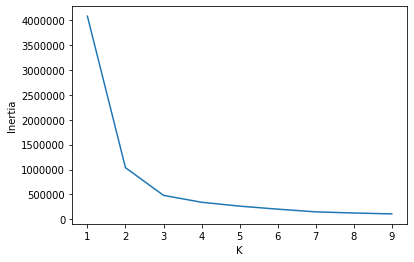

In [3]:
import matplotlib.pyplot as plt

k_values = range(1, 10)
inertia_values = [KMeans(k).fit(locations).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

Looks like there are 2 or 3 clusters, but having browsed the headlines previously 3 seems more likely. So it ooks like the lucky guess was correct after all.

Lets have a go at plotting these clusters. It's not very useful for any analysis yet as there is no map, but it might help us decide if the clusters make any sense.

/home/andy_w/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


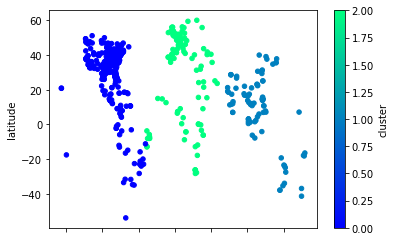

In [4]:
locations['cluster']=assigned_cluster
#print(locations.head(10))
locations.plot.scatter(y='latitude', x='longitude',c='cluster',colormap='winter')


Ignoring the error for now. It looks promising, but lets look at custers based on spacial density (i.e. DBSCAN) in case the clusters are not related to nearness, but instead relate to how densely packed they are.

In [5]:
epsilon=5.0
min_points=10

from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
density_clusters = cluster_model.fit_predict(locations)
print(density_clusters)

[ 0  0  0  7  0 -1  0  1  0 -1  0  0 -1  0  2  2  3  0  0  0  0  0  1 -1
  0  0  1  3 -1 -1  7 -1 -1  0  3  0 -1  2  2  4  0  0 -1 -1  0  6 -1 -1
  0  0  3  3  0 -1  5 -1  4  0  0 -1 -1  0 -1 -1  2 -1 -1 -1 -1  0 -1  4
 -1  4 -1 -1  0 -1  0  0  6 -1 -1  0 -1 -1  4 -1 -1  0 -1  0  2  2 -1  2
  3 -1 -1 -1 -1  0 -1  0  0 -1  1 -1  0  0  0 -1  3  0  6  0 -1 -1  3  0
 -1 -1  0 -1 -1 -1  0  2 -1  2  4  0  0  0 -1  3  3 -1 -1  0  0  1  0  0
  3  0 -1  0  0  3  3  3 -1  0  0  0 -1  0 -1 -1 -1  0 -1  0  0 -1  0  0
  1  3 -1 -1  1 -1  3 -1  0  1  0  0 -1  4  0  0  0  0  5 -1 -1  5  7  0
  1  3 -1  2  3  1  0  0  0  0  0  0  3  0  3  0  0  0  1  3  5  0  0  6
  1  3  0  3 -1 -1  1  0  0  3 -1  0  0  1  0 -1  0 -1  0 -1 -1 -1  1  0
 -1  3  0 -1  0  3 -1  0 -1  3  0  0  0  0 -1  0  0 -1 -1  6 -1  0  6  0
  1  0 -1  1 -1 -1  0  7  2 -1  2  0 -1  0  0  3 -1  7  0 -1  3 -1  0  0
  0  1  1  3 -1 -1  0 -1  6  0  1  1  0  3  0 -1  0  1 -1  6  1 -1  5 -1
  0 -1  3  0  0  0  1  7  0 -1 -1  1  0  0  1  3 -1

In [6]:
locations['d_cluster']=density_clusters

print(locations.head(10))


   latitude  longitude  cluster  d_cluster
0  25.77427  -80.19366        0          0
1  40.71427  -74.00597        0          0
2  25.79065  -80.13005        0          0
3  -8.05389  -34.88111        2          7
4  32.78306  -96.80667        0          0
5 -14.83333  -64.90000        0         -1
6  29.76328  -95.36327        0          0
7  46.20222    6.14569        2          1
8  33.74900  -84.38798        0          0
9 -23.54750  -46.63611        0         -1


/home/andy_w/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
cluster_groups = locations.groupby('d_cluster')

In [9]:
print(cluster_groups.first())

           latitude  longitude  cluster
d_cluster                              
-1        -14.83333  -64.90000        0
 0         25.77427  -80.19366        0
 1         46.20222    6.14569        2
 2         14.60420  120.98220        1
 3         34.05223 -118.24368        0
 4         13.68935  -89.18718        0
 5         40.58526 -105.08442        0
 6          4.60971  -74.08175        0
 7         -8.05389  -34.88111        2


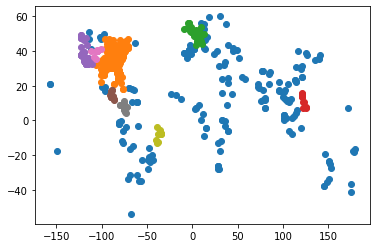

In [10]:

for cluster_id, items in cluster_groups:
    plt.scatter(items.longitude, items.latitude)

plt.show()

### 2. Visualize the clusters on a world map using the Basemap library. Color the headlines by the cluster assignment.

* Determine if the clusters are reasonable: Are headlines geographically close to one another in the same cluster?
* Write a visualization function to quickly check clustering results.


In [11]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()

/home/andy_w/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Lets plot world coastlines.

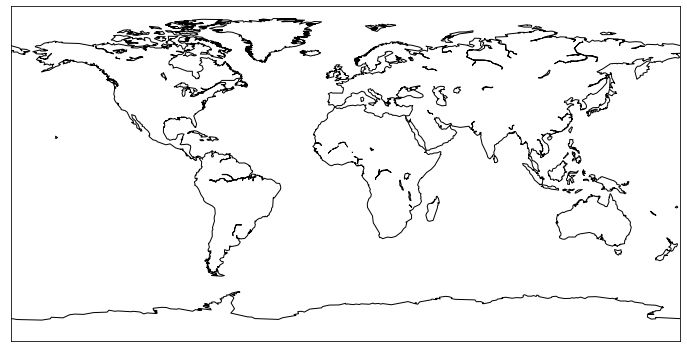

In [12]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
plt.show()

Lets add countries

/home/andy_w/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


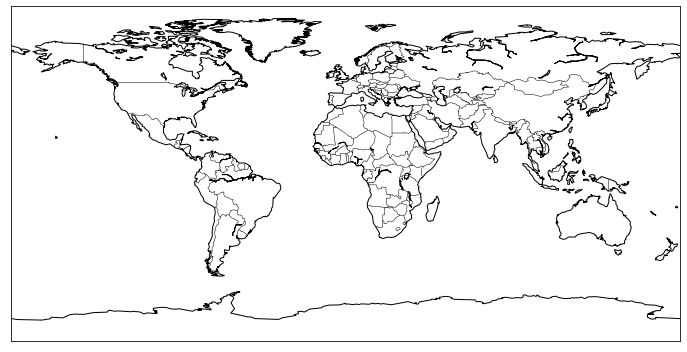

In [13]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 8))

for cluster_id, items in cluster_groups:
    if cluster_id == -1:
        continue
    
    plt.scatter(items.longitude, items.latitude)
    
#map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()